In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as skm

In [14]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score

In [15]:
data = pd.read_csv('data.csv', sep=';')
# data.sample(5)

In [16]:
X = data.drop('Target', axis=1)
y = data['Target']

In [17]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Lab 4

### Task 1

In [18]:
X_train_new, X_val, y_train_new, y_val = skm.train_test_split(
    X_train, y_train, test_size=0.125, random_state=0
)

### Task 2

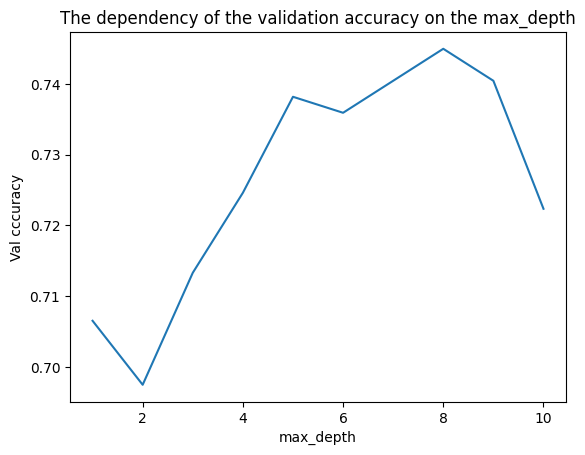

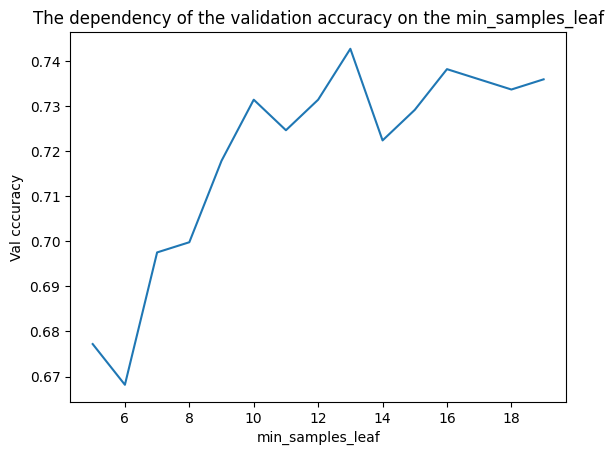

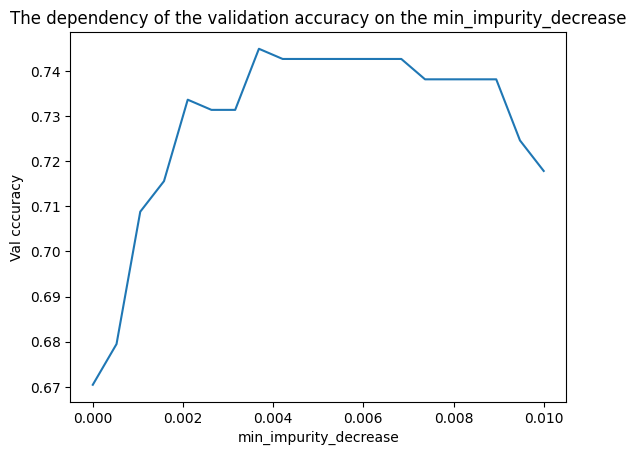

In [19]:
parameters = { # Experiment with different values of the parameters max_depth, min_samples_leaf, and min_impurity_decrease
    'max_depth': range(1, 11),
    'min_samples_leaf': range(5, 20),
    'min_impurity_decrease': np.linspace(0, 0.01, 20)
}

overall_results = {} # Store the results of the experiments here

for param_name, values in parameters.items(): # Iterate over the parameters
    res = [] # Store the results of the experiments for the current parameter here
    for value in values:
        # Train a series of classifiers on the new train set, test on the validation set
        clf = DTC(criterion='entropy', **{param_name: value}, random_state=0) # Create a classifier with the current parameter value
        clf.fit(X_train_new, y_train_new) # Train the classifier
        res.append(accuracy_score(y_val, clf.predict(X_val))) # Test the classifier on the validation set and store the result
        # print(f'{param_name} ----- {value} : {accuracy_score(y_val, clf.predict(X_val))}')
    overall_results[param_name] = res

for param_name, accuracies in overall_results.items():
    plt.plot(parameters[param_name], accuracies, label=param_name)
    plt.xlabel(f'{param_name}')
    plt.ylabel('Val cccuracy')
    plt.title(f'The dependency of the validation accuracy on the {param_name}')
    plt.show()

In [20]:
overall_results

{'max_depth': [0.7065462753950339,
  0.6975169300225733,
  0.7133182844243793,
  0.7246049661399548,
  0.7381489841986456,
  0.7358916478555305,
  0.7404063205417607,
  0.744920993227991,
  0.7404063205417607,
  0.7223476297968398],
 'min_samples_leaf': [0.6772009029345373,
  0.6681715575620768,
  0.6975169300225733,
  0.6997742663656885,
  0.7178329571106095,
  0.7313769751693002,
  0.7246049661399548,
  0.7313769751693002,
  0.7426636568848759,
  0.7223476297968398,
  0.7291196388261851,
  0.7381489841986456,
  0.7358916478555305,
  0.7336343115124153,
  0.7358916478555305],
 'min_impurity_decrease': [0.6704288939051919,
  0.6794582392776524,
  0.708803611738149,
  0.7155756207674944,
  0.7336343115124153,
  0.7313769751693002,
  0.7313769751693002,
  0.744920993227991,
  0.7426636568848759,
  0.7426636568848759,
  0.7426636568848759,
  0.7426636568848759,
  0.7426636568848759,
  0.7426636568848759,
  0.7381489841986456,
  0.7381489841986456,
  0.7381489841986456,
  0.738148984198645

### Task 3

In [21]:
best_max_depth = parameters['max_depth'][np.argmax(overall_results['max_depth'])] # Find the best value of max_depth
best_min_samples_leaf = parameters['min_samples_leaf'][np.argmax(overall_results['min_samples_leaf'])] # Find the best value of min_samples_leaf
best_min_impurity_decrease = parameters['min_impurity_decrease'][np.argmax(overall_results['min_impurity_decrease'])] # Find the best value of min_impurity_decrease

# Model with best max_depth
clf_max_depth = DTC(criterion='entropy', max_depth=best_max_depth, random_state=0)
clf_max_depth.fit(X_train_new, y_train_new)
test_acc_max_depth = accuracy_score(y_test, clf_max_depth.predict(X_test))
print(f'Test accuracy for best max_depth ({best_max_depth}): {test_acc_max_depth:.4f}')

# Model with best min_samples_leaf
clf_min_samples_leaf = DTC(criterion='entropy', min_samples_leaf=best_min_samples_leaf, random_state=0)
clf_min_samples_leaf.fit(X_train_new, y_train_new)
test_acc_min_samples_leaf = accuracy_score(y_test, clf_min_samples_leaf.predict(X_test))
print(f'Test accuracy for best min_samples_leaf ({best_min_samples_leaf}): {test_acc_min_samples_leaf:.4f}')

# Model with best min_impurity_decrease
clf_min_impurity = DTC(criterion='entropy', min_impurity_decrease=best_min_impurity_decrease, random_state=0)
clf_min_impurity.fit(X_train_new, y_train_new)
test_acc_min_impurity = accuracy_score(y_test, clf_min_impurity.predict(X_test))
print(f'Test accuracy for best min_impurity_decrease ({best_min_impurity_decrease}): {test_acc_min_impurity:.4f}')

# Model with best max_depth = 3 (from notebook)
clf_depth_3 = DTC(criterion='entropy', max_depth=3, random_state=0)
clf_depth_3.fit(X_train_new, y_train_new)
test_acc_depth_3 = accuracy_score(y_test, clf_depth_3.predict(X_test))
print(f'Test accuracy for max_depth=3: {test_acc_depth_3:.4f}')

# Model with best max_depth = 10 (from notebook)
clf_depth_10 = DTC(criterion='entropy', max_depth=10, random_state=0)
clf_depth_10.fit(X_train_new, y_train_new)
test_acc_depth_10 = accuracy_score(y_test, clf_depth_10.predict(X_test))
print(f'Test accuracy for max_depth=10: {test_acc_depth_10:.4f}')

# simple baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent") # Create a dummy classifier that always predicts the majority class
dummy_clf.fit(X_train_new, y_train_new) # Train the dummy classifier
baseline_acc = accuracy_score(y_test, dummy_clf.predict(X_test)) # Test the dummy classifier on the test set
print(f'Baseline Accuracy (majority class classification): {baseline_acc}')

Test accuracy for best max_depth (8): 0.7582
Test accuracy for best min_samples_leaf (13): 0.7322
Test accuracy for best min_impurity_decrease (0.0036842105263157894): 0.7571
Test accuracy for max_depth=3: 0.7401
Test accuracy for max_depth=10: 0.7390
Baseline Accuracy (majority class classification): 0.4994350282485876
